# Plot the network output versus all possible weight combos in a network where the sign of a gradient might flip

Minimal example network
![setup.png](../setup.png)

In [1]:
import jax.numpy as jnp
import jax

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm


import utils.sign_change_net as scn
import utils.plotting as plotting

from jax import config

config.update("jax_enable_x64", True)

In [2]:
device_idx = 0
jax.config.update("jax_default_device", jax.devices()[device_idx])

### Define input and weights

In [3]:
x = jnp.array(1)

# weights
w = jnp.array(1)
v1 = jnp.array(0.05)
v2 = jnp.array(0.1)
u1 = jnp.array(1)
u2 = jnp.array(-1)


In [4]:
# Define betas and surrogate betas
beta_sgs = [2, 4, 20]
beta = beta_sgs[-1]

beta_sgs_w = [15, 30, 100]
beta_w = beta_sgs_w[-1]


In [5]:
# define axes
u1_ax = jnp.linspace(-2, 2, 1001)
u2_ax = jnp.linspace(-2, 2, 1011)

v1_ax = jnp.linspace(-2, 2, 1021)
v2_ax = jnp.linspace(-2, 2, 1031)

w_ax = jnp.linspace(-0.2, 0.2, 10001)


In [6]:
grads = {}
grad_scale = 50
head_width = 0.2

# define point to get gradients
gw = jnp.array(-0.188)
gv1 = jnp.array(1.7)
gv2 = jnp.array(-1.3)
gu1 = jnp.array(-0.1)
gu2 = jnp.array(1)


In [7]:
# define plotting parameters

cmap = "Greys_r"
arrow = "#ebb400"
color = "#008ca5"
levels = 20

preamble = "Plots/"

100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


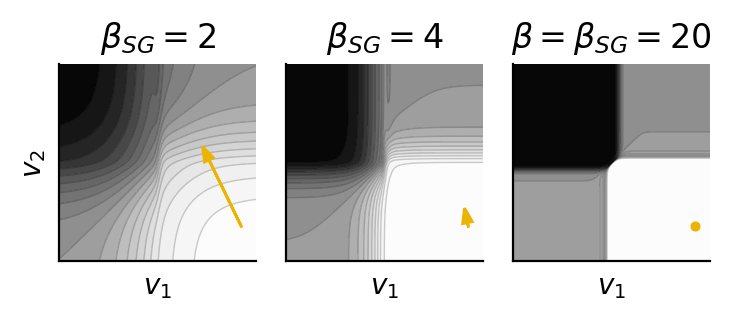

In [8]:
fig, ax = plt.subplots(
    1,
    len(beta_sgs),
    figsize=(1.25 * len(beta_sgs), 3),
    dpi=200,
    sharex=True,
    sharey=True,
    subplot_kw={"adjustable": "box", "aspect": 1},
)

for i, beta_sg in enumerate(tqdm(beta_sgs)):
    y = scn.net_v(w, v1_ax, v2_ax, u1, u2, x, beta)

    grads = scn.grad_value(w, gv1, gv2, u1, u2, x, beta, beta_sg)
    grad = jnp.array([grads[1], grads[2]]) * grad_scale
    # grad = grad/jnp.linalg.norm(grad) * grad_scale

    ref_idx = 0
    ref_i_grad, ref_grad = scn.get_gradients_over_v1(
        w, v1_ax, v2_ax[ref_idx], u1, u2, x, beta, beta_sg, y[ref_idx]
    )
    i_grad_1, grad_1 = scn.get_grads_over_v2_for_all_v1(
        w, v1_ax, v2_ax, u1, u2, x, beta, beta_sg, ref_i_grad
    )
    i_grad_1_norm = (i_grad_1 - jnp.min(i_grad_1)) / (
        jnp.max(i_grad_1) - jnp.min(i_grad_1)
    )
    plotting.contour(
        ax[i],
        v1_ax,
        v2_ax,
        jnp.transpose(i_grad_1_norm),
        levels=levels,
        cmap=cmap,
        color="black",
        alpha=0.2,
    )
    if i == len(beta_sgs) - 1:
        ax[i].scatter(gv1, gv2, color=arrow, s=7)
        ax[i].set_title(r"$\beta = \beta_{SG} = $" + r"${}$".format(beta_sg))
    else:
        ax[i].arrow(
            gv1, gv2, *(grad * -1), color=arrow, head_width=head_width, zorder=10
        )
        ax[i].set_title(r"$\beta_{SG} = $" + r"${}$".format(beta_sg))

    ax[i].set_xlabel(r"$v_1$")

ax[0].set_ylabel(r"$v_2$")
ax[0].set_xticks([])
ax[0].set_yticks([])

plt.tight_layout()
sns.despine()
plt.savefig(preamble + "SGs_over_v_1.svg")
plt.show()

100%|██████████| 3/3 [00:03<00:00,  1.09s/it]


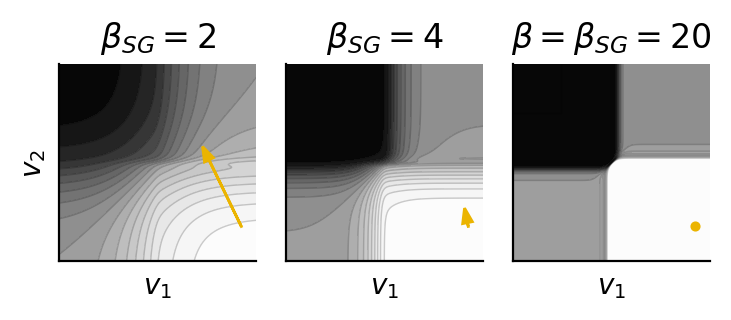

In [9]:
fig, ax = plt.subplots(
    1,
    len(beta_sgs),
    figsize=(1.25 * len(beta_sgs), 3),
    dpi=200,
    sharex=True,
    sharey=True,
    subplot_kw={"adjustable": "box", "aspect": 1},
)

for i, beta_sg in enumerate(tqdm(beta_sgs)):
    y = scn.net_v(w, v1_ax, v2_ax, u1, u2, x, beta)
    grads = scn.grad_value(w, gv1, gv2, u1, u2, x, beta, beta_sg)
    grad = jnp.array([grads[1], grads[2]]) * grad_scale

    ref_idx = 0
    ref_i_grad, ref_grad = scn.get_gradients_over_v2(
        w, v1_ax[ref_idx], v2_ax, u1, u2, x, beta, beta_sg, jnp.transpose(y)[ref_idx]
    )
    i_grad_2, grad_2 = scn.get_grads_over_v1_for_all_v2(
        w, v1_ax, v2_ax, u1, u2, x, beta, beta_sg, ref_i_grad
    )
    i_grad_2_norm = (i_grad_2 - jnp.min(i_grad_2)) / (
        jnp.max(i_grad_2) - jnp.min(i_grad_2)
    )
    plotting.contour(
        ax[i],
        v1_ax,
        v2_ax,
        i_grad_2_norm,
        levels=levels,
        cmap=cmap,
        color="black",
        alpha=0.2,
    )

    if i == len(beta_sgs) - 1:
        ax[i].scatter(gv1, gv2, color=arrow, s=7)
        ax[i].set_title(r"$\beta = \beta_{SG} = $" + r"${}$".format(beta_sg))
    else:
        ax[i].arrow(
            gv1, gv2, *(grad * -1), color=arrow, head_width=head_width, zorder=10
        )
        ax[i].set_title(r"$\beta_{SG} = $" + r"${}$".format(beta_sg))


    ax[i].set_xlabel(r"$v_1$")

ax[0].set_ylabel(r"$v_2$")
ax[0].set_xticks([])
ax[0].set_yticks([])

plt.tight_layout()
sns.despine()
plt.savefig(preamble + "SGs_over_v_2.svg")
plt.show()

# Vary over parameter $w$

In [10]:
def normalize(x):
    return (x - jnp.min(x)) / (jnp.max(x) - jnp.min(x))


def scale(x, scaling=1, offset=1):
    scaled = x * (scaling / (x[0] - x[-1]))
    scaled += offset - scaled[0]
    return scaled

def minmax_scaling(x):
    return x / (jnp.max(x) - jnp.min(x))

100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


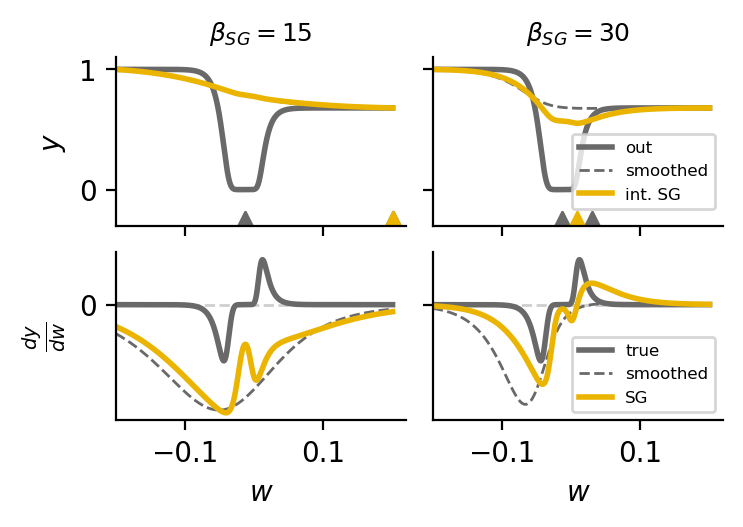

In [11]:
fac = 1.2
fig, ax = plt.subplots(
    2,
    len(beta_sgs_w)-1,
    dpi=200,
    sharex=True,
    sharey="row",
    figsize=(len(beta_sgs_w)*fac, 2.1*fac),
    constrained_layout=True,
)

for i, beta_sg in enumerate(tqdm(beta_sgs_w[:-1])):
    # plot network output
    y = scn.net_w(w_ax, v1, v2, u1, u2, x, beta_w)
    norm_y = (y - jnp.min(y)) / (jnp.max(y) - jnp.min(y))
    ax[0][i].plot(w_ax, norm_y, color="dimgrey", lw=2, alpha=1, label="out", zorder=-2)

    # indicate minimum location
    idx = jnp.argmin(norm_y)
    ax[0][i].scatter(w_ax[idx], -0.25, color="dimgrey", lw=1, marker="^")

    out_diff = norm_y[0] - norm_y[-1]

    # plot true gradients
    int_grad_true, gradient_true = scn.get_gradients_over_w(
        w_ax, v1, v2, u1, u2, x, beta_w, beta_w, y[0]
    )

    scaled_grad_true = minmax_scaling(jnp.array(gradient_true))
    ax[1][i].plot(
        w_ax, scaled_grad_true, color="dimgrey", lw=2, alpha=1, label=r"true"
    )

    ####################################################################################################################
    # USING ONLY BETA_SG
    ####################################################################################################################

    y_sigm = scn.net_w(w_ax, v1, v2, u1, u2, x, beta_sg)
    scaled_y_sigm = scale(y_sigm, scaling=out_diff, offset=1)
    ax[0][i].plot(
        w_ax,
        scaled_y_sigm,
        color="dimgrey",
        lw=1,
        alpha=1,
        ls="--",
        label="smoothed",
        zorder=-1,
    )

    idx = jnp.argmin(scaled_y_sigm)
    ax[0][i].scatter(w_ax[idx], -0.25, color="dimgrey", lw=1, marker="^", zorder=-1)

    int_grad_true_sigm, gradient_true_sigm = scn.get_gradients_over_w(
        w_ax, v1, v2, u1, u2, x, beta_sg, beta_sg, y[0]
    )

    norm_grad_true_sigm = minmax_scaling(jnp.array(gradient_true_sigm))
    ax[1][i].plot(
        w_ax,
        norm_grad_true_sigm,
        color="dimgrey",
        lw=1,
        alpha=1,
        ls="--",
        label="smoothed",
        zorder=-1,
    )

    ####################################################################################################################
    # SURROGATE GRADIENTS
    ####################################################################################################################

    # plot integrated surrogate gradients
    int_grad, gradient = scn.get_gradients_over_w(
        w_ax, v1, v2, u1, u2, x, beta_w, beta_sg, y[0]
    )

    scaled_int_grad = scale(jnp.array(int_grad), scaling=out_diff, offset=1)
    ax[0][i].plot(w_ax, scaled_int_grad, color=arrow, lw=2, alpha=1, label="int. SG")

    # indicate minimum location
    idx = jnp.argmin(scaled_int_grad)
    ax[0][i].scatter(w_ax[idx], -0.25, color=arrow, lw=1, marker="^")

    norm_grad = minmax_scaling(jnp.array(gradient))
    ax[1][i].plot(w_ax, norm_grad, color=arrow, lw=2, alpha=1, label="SG")

    ax[1][i].hlines(
        0, w_ax[0], w_ax[-1], color="silver", lw=1, linestyle="--", alpha=0.75, zorder=-3
    )

    ax[0][i].set_title(r"$\beta_{SG} =$" + r"{}".format(beta_sg), fontsize=9)
    ax[1][i].set_xlabel(r"$w$")


ax[0][0].set_ylabel(r"$y$")
ax[1][0].set_ylabel(r"$\frac{dy}{dw}$")
ax[0][-1].legend(fontsize=6, loc="lower left", bbox_to_anchor=(0.45, 0.05))
ax[1][-1].legend(fontsize=6, loc="lower right")

ax[0][0].set_yticks([0, 1])
ax[1][0].set_yticks([0])
ax[1][0].set_xticks([-0.1, 0.1])

ax[1][0].set_xlim([-0.2, 0.22])
ax[0][0].set_ylim([-0.3, 1.1])


sns.despine()
plt.savefig(preamble + "sg_vs_true_g.pdf")
plt.show()

100%|██████████| 2/2 [00:00<00:00, 25.44it/s]


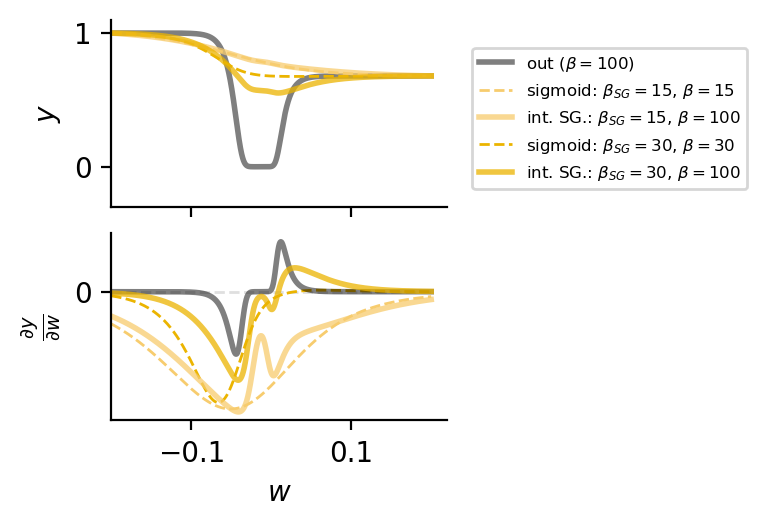

In [12]:
fac = 1.2
fig, ax = plt.subplots(
    2,
    1,
    dpi=200,
    sharex=True,
    sharey="row",
    figsize=(3.1 * fac, 2.1 * fac),
    constrained_layout=True,
)

yellows = ["#f7cc6e", "#EBB400", "#b28912"]

# plot network output
y = scn.net_w(w_ax, v1, v2, u1, u2, x, beta_w)
norm_y = (y - jnp.min(y)) / (jnp.max(y) - jnp.min(y))
ax[0].plot(w_ax, norm_y, color="black", lw=2, alpha=0.5, label=r"out ($\beta = $"+str(beta_w)+")", zorder=-2)

# indicate minimum location
idx = jnp.argmin(norm_y)
# ax[0].scatter(w_ax[idx], -0.25, color="dimgrey", lw=1, marker="^")

out_diff = norm_y[0] - norm_y[-1]

# plot true gradients
int_grad_true, gradient_true = scn.get_gradients_over_w(
    w_ax, v1, v2, u1, u2, x, beta_w, beta_w, y[0]
)

scaled_grad_true = minmax_scaling(jnp.array(gradient_true))
ax[1].plot(w_ax, scaled_grad_true, color="black", lw=2, alpha=0.5, label=r"true")


for i, beta_sg in enumerate(tqdm(beta_sgs_w[:-1])):

    ####################################################################################################################
    # USING ONLY BETA_SG
    ####################################################################################################################

    y_sigm = scn.net_w(w_ax, v1, v2, u1, u2, x, beta_sg)
    scaled_y_sigm = scale(y_sigm, scaling=out_diff, offset=1)
    ax[0].plot(
        w_ax,
        scaled_y_sigm,
        color=yellows[i],
        lw=1,
        alpha=1,
        label=r"sigmoid: $\beta_{SG} = $" + str(beta_sg) + r", $\beta = $" + str(beta_sg),
        ls="--",
        zorder=-1,
    )

    idx = jnp.argmin(scaled_y_sigm)
    # ax[0].scatter(w_ax[idx], -0.25, color="dimgrey", lw=1, marker="^", zorder=-1)

    int_grad_true_sigm, gradient_true_sigm = scn.get_gradients_over_w(
        w_ax, v1, v2, u1, u2, x, beta_sg, beta_sg, y[0]
    )

    norm_grad_true_sigm = minmax_scaling(jnp.array(gradient_true_sigm))
    ax[1].plot(
        w_ax,
        norm_grad_true_sigm,
        color=yellows[i],
        lw=1,
        alpha=1,
        ls="--",
        label="smoothed",
        zorder=-1,
    )

    ####################################################################################################################
    # SURROGATE GRADIENTS
    ####################################################################################################################

    # plot integrated surrogate gradients
    int_grad, gradient = scn.get_gradients_over_w(
        w_ax, v1, v2, u1, u2, x, beta_w, beta_sg, y[0]
    )

    scaled_int_grad = scale(jnp.array(int_grad), scaling=out_diff, offset=1)
    ax[0].plot(
        w_ax, scaled_int_grad, color=yellows[i], lw=2, alpha=0.75, label=r"int. SG.: $\beta_{SG} = $" + str(beta_sg) + r", $\beta = $" + str(beta_w)
    )

    # indicate minimum location
    idx = jnp.argmin(scaled_int_grad)
    # ax[0].scatter(w_ax[idx], -0.25, color=arrow, lw=1, marker="^")

    norm_grad = minmax_scaling(jnp.array(gradient))
    ax[1].plot(w_ax, norm_grad, color=yellows[i], lw=2, alpha=0.75, label="SG")

ax[1].hlines(
    0, w_ax[0], w_ax[-1], color="silver", lw=1, linestyle="--", alpha=0.5, zorder=-3
)

ax[1].set_xlabel(r"$w$")


ax[0].set_ylabel(r"$y$")
ax[1].set_ylabel(r"$\frac{\partial y}{\partial w}$")
ax[0].legend(fontsize=6, loc="lower left", bbox_to_anchor=(1.05, 0.05))
# ax[1].legend(fontsize=6, loc="lower right")

ax[0].set_yticks([0, 1])
ax[1].set_yticks([0])
ax[1].set_xticks([-0.1, 0.1])

ax[1].set_xlim([-0.2, 0.22])
ax[0].set_ylim([-0.3, 1.1])


sns.despine()
plt.savefig(preamble + "sg_vs_true_g-single.pdf")
plt.show()